# Obligatorio 4 - Algoritmos

Nombre del estudiante: Patricio Carrau

Debajo de cada pregunta o tarea incluya las celdas necesarias para desarrolar la respuesta. Puede usar una o varias
celdas de código o mark down (https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook)

Para entregar, renombrar este notebook como "Obligatorio 4 - Apellido Nombre" 


## Ejercicio 1
Usted es el piloto de un avión que tiene que despegar desde el punto (0,0) y aterrizar al punto (D, 0). La altura máxima
 a la que se puede ir es H, y el avión no puede aterrizar y volver a despegar en el medio del trayecto. Para cada
 distancia y altura (asumimos las mismas son discretas), tenemos un mapa de viento

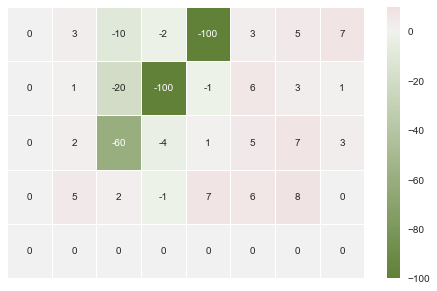

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

plt.style.use("seaborn")

w = [[0, 3, -10, -2, -100, 3, 5, 7],
     [0, 1, -20, -100, -1, 6, 3, 1],
     [0, 2, -60, -4, 1, 5, 7, 3],
     [0, 5, 2, -1, 7, 6, 8, 0],
     [0, 0, 0, 0, 0, 0, 0, 0]]

data = np.matrix(w)

plt.figure(figsize=(8, 5))
cmap = sns.diverging_palette(110, 10, l=50, center="light", as_cmap=True)
sns.color_palette(['green', 'red'])
heat_map = sns.heatmap(data, cmap=cmap, center=0.00, vmin=-100.00, vmax=10.00, linewidth=1, annot=True, fmt='g')
plt.axis('off')
plt.show()

En cada coordenada usted debe decidir si mantenerse en la misma altura (gastando 30 unidades de combustible), bajar de
altura (gastando 20 unidades de combustible), o subir de altura (gastando 60 unidades de combustible). En cada
coordenada además de las unidades de combustible debido a mantener, subir o bajar de altura uno tiene que sumar la
cantidad de combustible indicada en el mapa. Los valores negativos corresponden a viento a favor lo que permite gastar
menos combustible. Los valores positivos indican viento en contra e implican un gasto mayor de combustible en ese punto.
Implementar un algoritmo eficiente que minimice el gasto en combustible del trayecto e imprima qué acción tomar en cada
distancia, para un mapa de viento dado. Analizar el orden en tiempo de ejecución  y uso de memoria de su algoritmo.


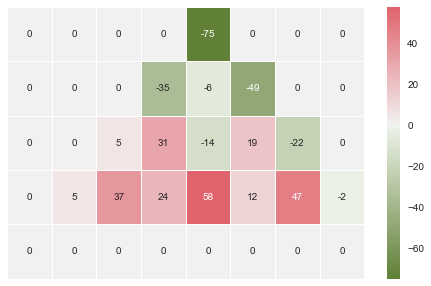

[-2, ['mover a 1,1', 'mover a 2,2', 'mover a 3,3', 'mover a 4,4', 'mover a 5,3', 'mover a 6,2', 'mover a 7,1']]


In [6]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

w = [[0, 3, -10, -2, -100, 3, 5, 7],
     [0, 1, -20, -100, -1, 6, 3, 1],
     [0, 2, -60, -4, 1, 5, 7, 3],
     [0, 5, 2, -1, 7, 6, 8, 0],
     [0, 0, 0, 0, 0, 0, 0, 0]]

#############################################
plt.style.use("seaborn")
def print_values(matrix):
    matrix_copy = [[element[0] for element in columna] for columna in matrix]
    data = np.matrix(matrix_copy)
    plt.figure(figsize=(8, 5))
    cmap = sns.diverging_palette(110, 10, l=50, center="light", as_cmap=True)
    sns.color_palette(['green', 'red'])
    heat_map = sns.heatmap(data, cmap=cmap, center=0.00, linewidth=1, annot=True, fmt='g')
    plt.axis('off')
    plt.show()
#############################################


def get_previous(matrix, h, max_height, distance):
    prev_max_height = abs(distance - 1 - max_height) - 1
    prev_min_h = h + 1 if h < max_height - 1 else 3
    if h == prev_max_height:
        prev_max_h = h
    elif h == prev_max_height + 1:
        prev_max_h = h - 1
    else:
        prev_max_h = h - 2
    prev_best = [np.inf, []]
    fuel_best = 0
    for height in range(prev_min_h, prev_max_h, -1): # 3
        fuel = 0
        if h > height:
            fuel = 20
        elif h == height:
            fuel = 30
        elif h < height:
            fuel = 60
        if matrix[height][distance - 1][0] + fuel < prev_best[0] + fuel_best:
            prev_best = matrix[height][distance - 1]
            fuel_best = fuel
    return prev_best, fuel_best


def mejor_ruta(w):
    max_distance = len(w[0]) - 1
    max_height = math.ceil(max_distance / 2)
    matrix = [[[0, []] for i in range(len(w[0]))] for j in range(len(w))]
    for distance in range(1, max_distance + 1): # n
        actual_max_height = abs(distance - max_height) - 1
        for height in range(int(max_height) - 1, actual_max_height, -1): # m
            if distance == 1:
                matrix[height][distance] = [w[height][distance], [[height, distance]]]
            else:
                prev_best, fuel = get_previous(matrix, height, max_height, distance)
                new_consumption = prev_best[0] + fuel + w[height][distance]
                new_route = prev_best[1].copy()
                new_route.append([height, distance])
                matrix[height][distance] = [new_consumption, new_route]
    print_values(matrix)
    # Invierto el eje de la altura
    for pos in range(len(matrix[max_height - 1][max_distance][1])):
        matrix[max_height - 1][max_distance][1][pos] =\
            'mover a ' + str(matrix[max_height - 1][max_distance][1][pos][1]) +\
            ',' + str(max_height - matrix[max_height - 1][max_distance][1][pos][0])
    print(matrix[max_height - 1][max_distance])
    return matrix[max_height - 1][max_distance]


assert ([-2, ['mover a 1,1', 'mover a 2,2', 'mover a 3,3',
              'mover a 4,4', 'mover a 5,3', 'mover a 6,2',
              'mover a 7,1']] == mejor_ruta(w))


El orden de ejecucion del algoritmo es $O(nm)$ con $n$ la cantidad de filas y $m$ la cantidad de columnas.

La memoria utilizada se da por la tabla complementaria $matrix$ que guarda la información del recorrido. Esta utiliza
$2nm$ de memoria.

## Ejercicio 2

El profesor Curly está planeando un viaje por carretera a través del país desde Boston a Seattle por la Interestatal 90,
y necesita alquilar un automóvil. Su primera inclinación fue llamar a las distintas agencias de alquiler de autos para
encontrar el mejor precio para alquilar un vehículo de Boston a Seattle, pero ha aprendido, para su consternación, que
esta puede no ser una estrategia óptima. Debido a la gran cantidad de agencias de alquiler de automóviles y las diversas
guerras de precios entre ellas, en realidad podría ser más barato alquilar un automóvil de Boston a Cleveland con Hertz,
seguido de un segundo automóvil de Cleveland a Chicago con Avis, etc. que alquilar cualquier auto desde Boston a
Seattle.

El profesor Curly no se opone a detenerse en una ciudad importante a lo largo de la Interestatal 90 para cambiar los
autos de alquiler; sin embargo, no desea dar marcha atrás debido a limitaciones de tiempo. (En otras palabras, un viaje
de Boston a Chicago, de Chicago a Cleveland y de Cleveland a Seattle está fuera de discusión). El profesor Curly ha
seleccionado n ciudades importantes a lo largo de la Interestatal 90 y las ha ordenado de este a oeste, donde se
encuentra la ciudad 1 Boston y la ciudad n son Seattle. Ha construido una tabla $costo[i, j]$ que para todo $i<j$
contiene el costo del automóvil de alquiler individual más barato de la ciudad i a la ciudad j. El profesor Curly quiere
 viajar lo más barato posible. Diseñe un algoritmo que resuelva este problema, argumente que su algoritmo es correcto y
 analice sus requisitos de tiempo y espacio de ejecución. Su algoritmo o algoritmos deben generar tanto el costo total
 del viaje como las distintas ciudades en las que se deben dejar y / o recoger los autos de alquiler.


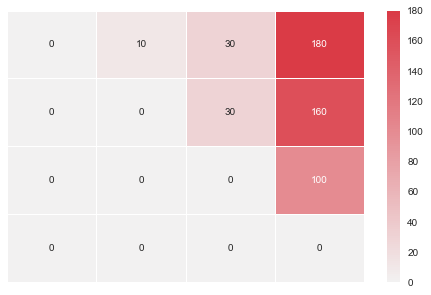

In [17]:
import numpy as np


#            boston   cleveland  chicago   seattle
# boston       0        10        30         180
# chicago      -         0        25         130
# cleveland    -        -          0         70
# seattle      -        -          -          0

#############################################
plt.style.use("seaborn")
def print_values(matrix):
    matrix_copy = [[element[0] for element in columna] for columna in matrix]
    data = np.matrix(matrix_copy)
    plt.figure(figsize=(8, 5))
    cmap = sns.diverging_palette(110, 10, l=50, center="light", as_cmap=True)
    sns.color_palette(['green', 'red'])
    heat_map = sns.heatmap(data, cmap=cmap, center=0.00, linewidth=1, annot=True, fmt='g')
    plt.axis('off')
    plt.show()
#############################################


def mejor_ruta(costos, origen, destino):
    mejores_costos = [[[0, []] for i in range(len(costos[0]))] for j in range(len(costos))]
    menos_costo = []
    for columna in range(origen + 1, destino + 1):  # n
        for fila in range(columna):
            if fila == 0:
                menos_costo = [costos[fila][columna], [0, columna]]
            else:
                nuevo_costo = costos[fila][columna] + mejores_costos[fila - 1][columna - 1][0]
                if nuevo_costo < menos_costo[0]:
                    temp_ciudades = mejores_costos[fila - 1][columna - 1][1].copy()
                    temp_ciudades.append(columna)
                    menos_costo = [nuevo_costo, temp_ciudades]
            mejores_costos[fila][columna] = menos_costo
    print_values(mejores_costos)
    return menos_costo[0], menos_costo[1]


costos = [[0, 10, 30, 180],
          [np.inf, 0, 25, 130],
          [np.inf, np.inf, 0, 70],
          [np.inf, np.inf, np.inf, 0]]

assert mejor_ruta(costos, 0, 3) == (100, [0, 2, 3])

## Ejercicio 3
Dada una secuencia de números enteros, escribir un algoritmo que devuelva la sub secuencia más larga de números
crecientes. Ejemplo: Si la secuencia es $1,20,3,7,40,5,2$, la respuesta es $1,3,7,40$.

1. Implementar una versión recursiva del algoritmo
2. Implementar una versión recursiva del algoritmo usando un caché (en una celda distinta usando la firma abajo)
3. Implementar una versión iterativa del algoritmo con principios de programación dinámica (en una celda distinta usando
la firma abajo).
4. Dar una cota asintótica superior en función del tamaño de la secuencia de entrada.


#### 1 Recursivo

In [8]:
def lcs(a, b):
    if len(a) == 0:
        return []
    elif len(b) == 0:
        return []
    elif a[0] == b[0]:
        sub_lcs = lcs(a[1:], b[1:])
        return [a[0]] + sub_lcs
    else:
        a_lcs = lcs(a, b[1:])
        b_lcs = lcs(a[1:], b)
        if len(a_lcs) > len(b_lcs):
            return a_lcs
        else:
            return b_lcs


def lgs(l):
    l_sorted = l.copy()
    l_sorted.sort()
    res = lcs(l, l_sorted)
    print(res)
    return res

array = [1, 20, 3, 7, 40, 5, 2]
assert (lgs([1, 20, 3, 7, 40, 5, 2]) == [1, 3, 7, 40])

[1, 3, 7, 40]


#### 2 Recursivo con cache

In [7]:
def hash_array(s):
    new = ''
    for x in s:
        new += str(x)
    return new


cache = {}
def lcs(a, b):
    if (hash_array(a), hash_array(b)) in cache:
        return cache[(hash_array(a), hash_array(b))]
    if len(a) == 0:
        ret = []
    elif len(b) == 0:
        ret = []
    elif a[0] == b[0]:
        sub_lcs = lcs(a[1:], b[1:])
        ret = [a[0]] + sub_lcs
    else:
        a_lcs = lcs(a, b[1:])
        b_lcs = lcs(a[1:], b)
        if len(a_lcs) > len(b_lcs):
            ret = a_lcs
        else:
            ret = b_lcs
    cache[(hash_array(a), hash_array(b))] = ret
    return ret


def lgs(l):
    l_sorted = l.copy()
    l_sorted.sort()
    res = lcs(l, l_sorted)
    print(res)
    return res

array = [1, 20, 3, 7, 40, 5, 2]
assert (lgs(array) == [1, 3, 7, 40])

[1, 3, 7, 40]


#### 3 Iterativo programación dinamica

In [5]:
def lgs(l):
    lgs_arr = []
    aux = []
    last = 0
    for actual in range(len(l)):
        lgs_arr.append(1)
        aux.append(None)
        for previous in range(actual):
            prev_size = lgs_arr[previous] + 1
            if l[previous] < l[actual] and prev_size > lgs_arr[actual]:
                lgs_arr[actual] = prev_size
                aux[actual] = previous
        if lgs_arr[actual] > lgs_arr[last]:
            last = actual
    substring = []
    ultimo = last
    while ultimo is not None:
        substring.append(l[ultimo])
        ultimo = (aux[ultimo])
    substring.reverse()
    print(substring)
    return substring

array = [1, 20, 3, 7, 40, 5, 2]
assert (lgs(array) == [1, 3, 7, 40])

[1, 3, 7, 40]


El orden de ejecucion del algoritmo es $O(n^2)$

## Ejercicio 4
Carlitos está visitando la fábrica de chocolates de Willy Wonka. Al final de la visita, le dan una caja en el cual podrá
 colocar hasta N kilogramos de tabletas de chocolates.  Carlitos durante su visita probó todas las distintas variedades
 de chocolates y les asignó una calificación a cada una de ellas (donde una calificación más alta corresponde a un
 chocolate más gustoso).

La fábrica cuenta con un stock ilimitado de tabletas. El objetivo de Carlitos es de llevarse chocolates de tal forma de
maximizar la calificación total (es decir, las suma de los productos entre la calificación y la cantidad). Las tabletas
no se pueden dividir.


Suponga que N=15 kg y la fábrica cuenta con el siguiente stock de tabletas: 

| Tableta | Peso de una tableta (kg) | Calificación |
| ---     | ---                      | ---          |
|TabletaPlus | 12 | 4 
|     ChockRick | 1 | 2 |
|     DulceChoc | 2 | 2 |
|     DeliChoc | 1 | 1 |
|     YumTableta | 4 | 10 |

1. Indique cuantas y cuales tabletas  deberá cargar Carlitos en su caja. 
2. Escriba un algoritmo que devuelva cuales y cuantas tabletas debe elegir Carlitos, dada una tabla como en la parte 1,
pero con pesos y calificaciones arbitrarias. Argumentar la correctitud del algoritmo de acuerdo a los estándares
usuales del curso.
3. Para su algoritmo dar la cota asintótica en términos de tiempo y espacio en memoria.


##### Respuestas

Carlitos deberá cargar 3 ChockRick y 3 YumTableta para optimizar el espacio utilizado.

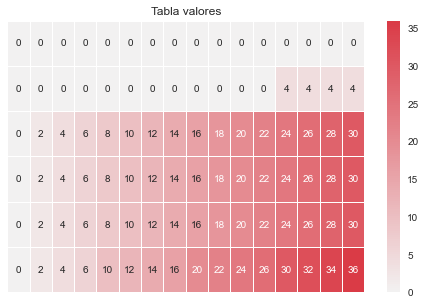

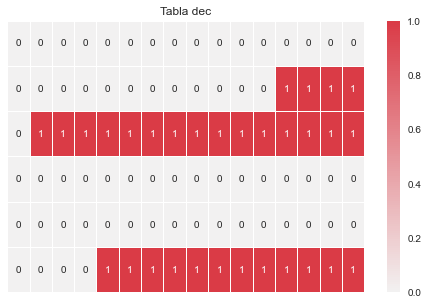

36 [0, 3, 0, 0, 3]


In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#############################################
# Mostrar tablas
plt.style.use("seaborn")
def print_values(matrix, pos, title):
    matrix_copy = [[element[pos] for element in columna] for columna in matrix]
    data = np.matrix(matrix_copy)
    plt.figure(figsize=(8, 5))
    cmap = sns.diverging_palette(110, 10, l=50, center="light", as_cmap=True)
    sns.color_palette(['green', 'red'])
    heat_map = sns.heatmap(data, cmap=cmap, center=0.00, linewidth=1, annot=True, fmt='g')
    plt.axis('off')
    plt.title(title)
    plt.show()
#############################################

def seleccionar(max_space, weights, scores):
    qty = len(scores)
    matrix = [[[0, 0] for x in range(max_space + 1)] for x in range(qty + 1)]
    for chocolate in range(qty):
        for space in range(1, max_space + 1):
            new_element = [0, 0]
            if weights[chocolate] > space:
                new_element = [matrix[chocolate][space][0], 0]
            elif weights[chocolate] < space:
                new_score = scores[chocolate] + matrix[chocolate+1][space - weights[chocolate]][0]
                if new_score > matrix[chocolate][space][0]:
                    new_element = [new_score, 1]
                else:
                    new_element = [matrix[chocolate][space][0], 0]
            else:
                if scores[chocolate] >= matrix[chocolate][space][0]:
                    new_element = [scores[chocolate], 1]
                else:
                    new_element = [matrix[chocolate][space][0], 0]
            matrix[chocolate+1][space] = new_element

    # Solo son para mostrar las matrices, no necesitan estar en el codigo
    print_values(matrix, 0, 'Tabla valores')
    print_values(matrix, 1, 'Tabla dec')

    final_score = matrix[qty][max_space][0]

    chocolates_qty = [0 for x in range(len(weights))]
    chocolate = len(matrix) - 1
    while max_space > 0:
        if matrix[chocolate][max_space][1] == 1:
            max_space -= weights[chocolate - 1]
            chocolates_qty[chocolate - 1] += 1
        elif matrix[chocolate][max_space][1] == 0:
            chocolate -= 1

    print(final_score, chocolates_qty)
    return final_score, chocolates_qty

W = 15
wt = [12, 1, 2, 1, 4]
val = [4, 2, 2, 1, 10]
assert (seleccionar(W, wt, val) == (36, [0, 3, 0, 0, 3]))

##### Respuesta

Asumo que el peso está asociado directamente al espacio utilizado.

- *Inicialización:* El peso utilizado y la calificación obtenida es 0.

- *Mantenimiento:* Se busca un new_element donde:
    - Si el peso del chocolate es mayor que el espacio disponible, se guarda el chocolate en la fila siguiente de
    $matrix$ y se asigna como 0.
    - Si el peso del chocolate es menor que el espacio disponible, se calcula nueva clasificación.
        - Si la nueva clasificacion es mayor que la clasificacion de la posicion, se guarda la nueva clasificacion en
        $matrix$ y se le asigna 1.
        - Si la nueva clasificacion es menor que la clasificacion de la posicion, se guarda la clasificacion de la
        posicion en $matrix$ y se le asigna 0.
- *Finalización:* Se toma el como clasificación final el último chocolate para el último puntaje, ya que es el elemento
    donde se acumularon todas las demas combinaciones. Por lo que buscamos ahora obtener las cantidades de cada uno de
    los chocolates necesarios para llegar a este valor, esto es tomando el indice $1$ de cada elemento en $matrix$ y
    recorremos la tabla de atrás hacia adelante hasta vaciar el espacio disponible:
    - Si se le asignó un 1, se utiliza el chocolate guardandolo en un array de chocolates y se resta su peso del espacio
        disponible.
    - Si se le asignó un 0, no se utiliza el chocolate y se sigue al siguiente elemento.


El orden de ejecucion del algoritmo es $O((m+1)n)$ con $n$ la cantidad de chocolates diferentes y $m$ el espacio
disponible. En el peor de los casos, donde $n=m$, tendriamos $O(n^2)$.

La memoria utilizada se da por la tabla complementaria $matrix$ que guarda la información del recorrido. Esta utiliza
$2nm$ de memoria.


